                datetimeUtc  air_quality_index   PM2.5    PM10        NO2  \
0 2024-06-22 01:00:00+00:00         594.500000  356.70  178.35  29.725000   
1 2024-06-22 02:00:00+00:00         679.333333  407.60  203.80  33.966667   
2 2024-06-22 03:00:00+00:00         662.000000  397.20  198.60  33.100000   
3 2024-06-22 04:00:00+00:00         490.833333  294.50  147.25  24.541667   
4 2024-06-22 05:00:00+00:00         353.966667  212.38  106.19  17.698333   

      SO2        CO        O3  
0  17.835  5.945000  5.945000  
1  20.380  6.793333  6.793333  
2  19.860  6.620000  6.620000  
3  14.725  4.908333  4.908333  
4  10.619  3.539667  3.539667  


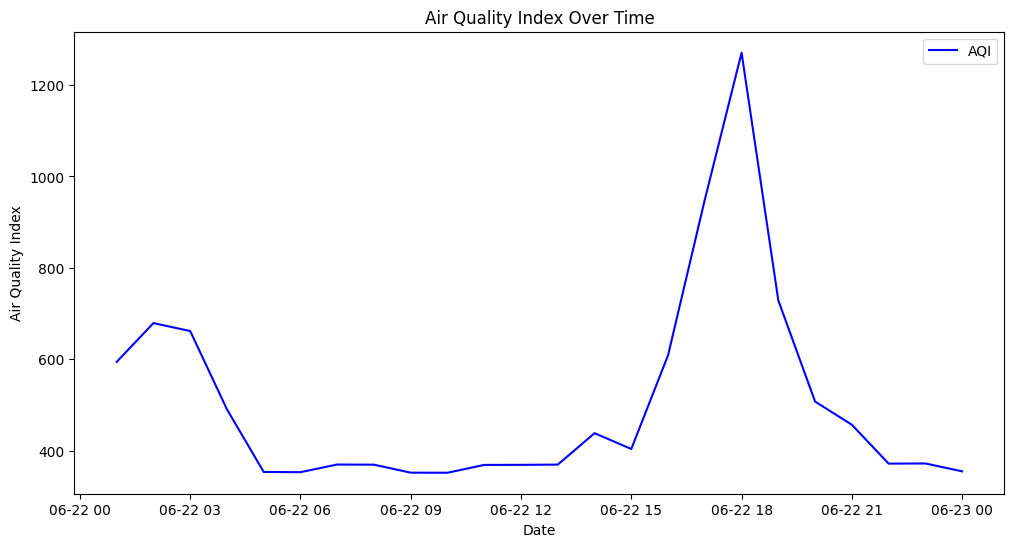

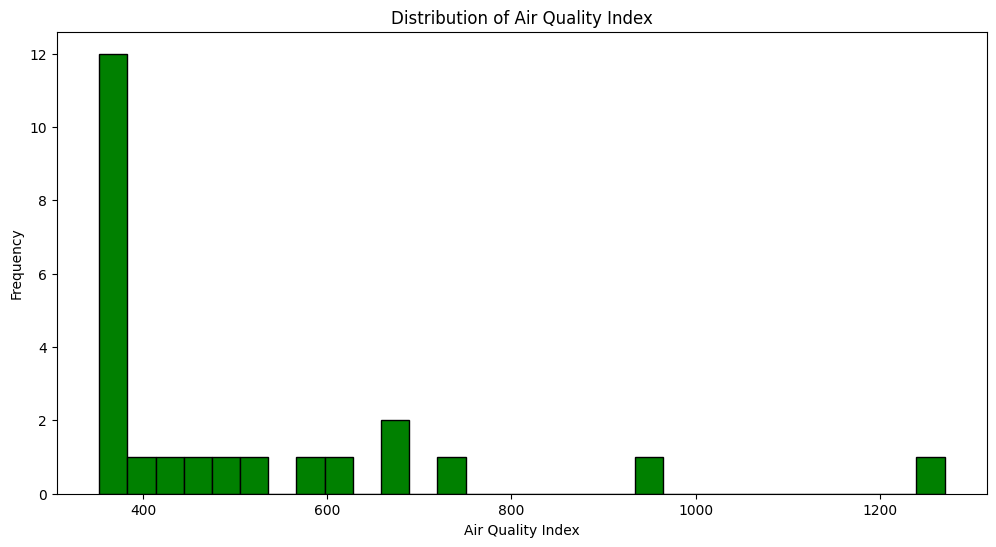

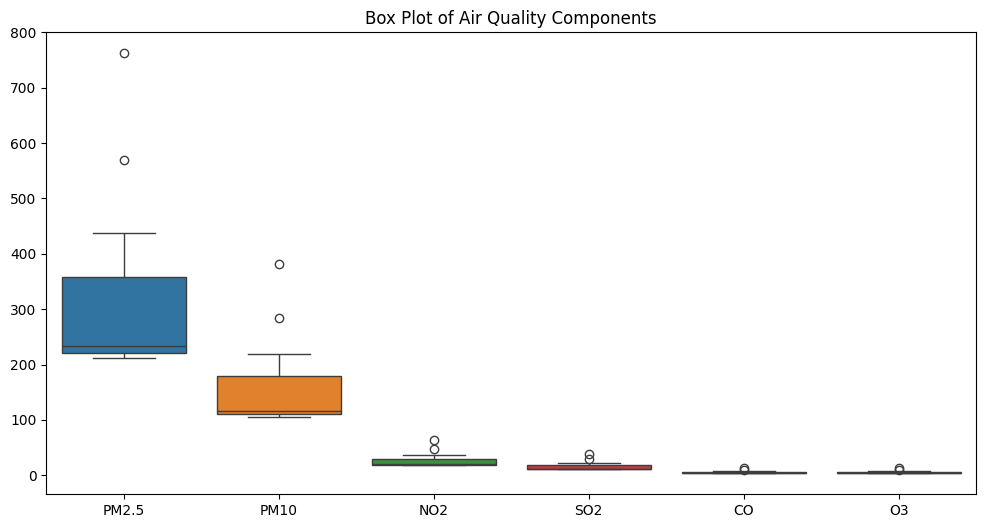

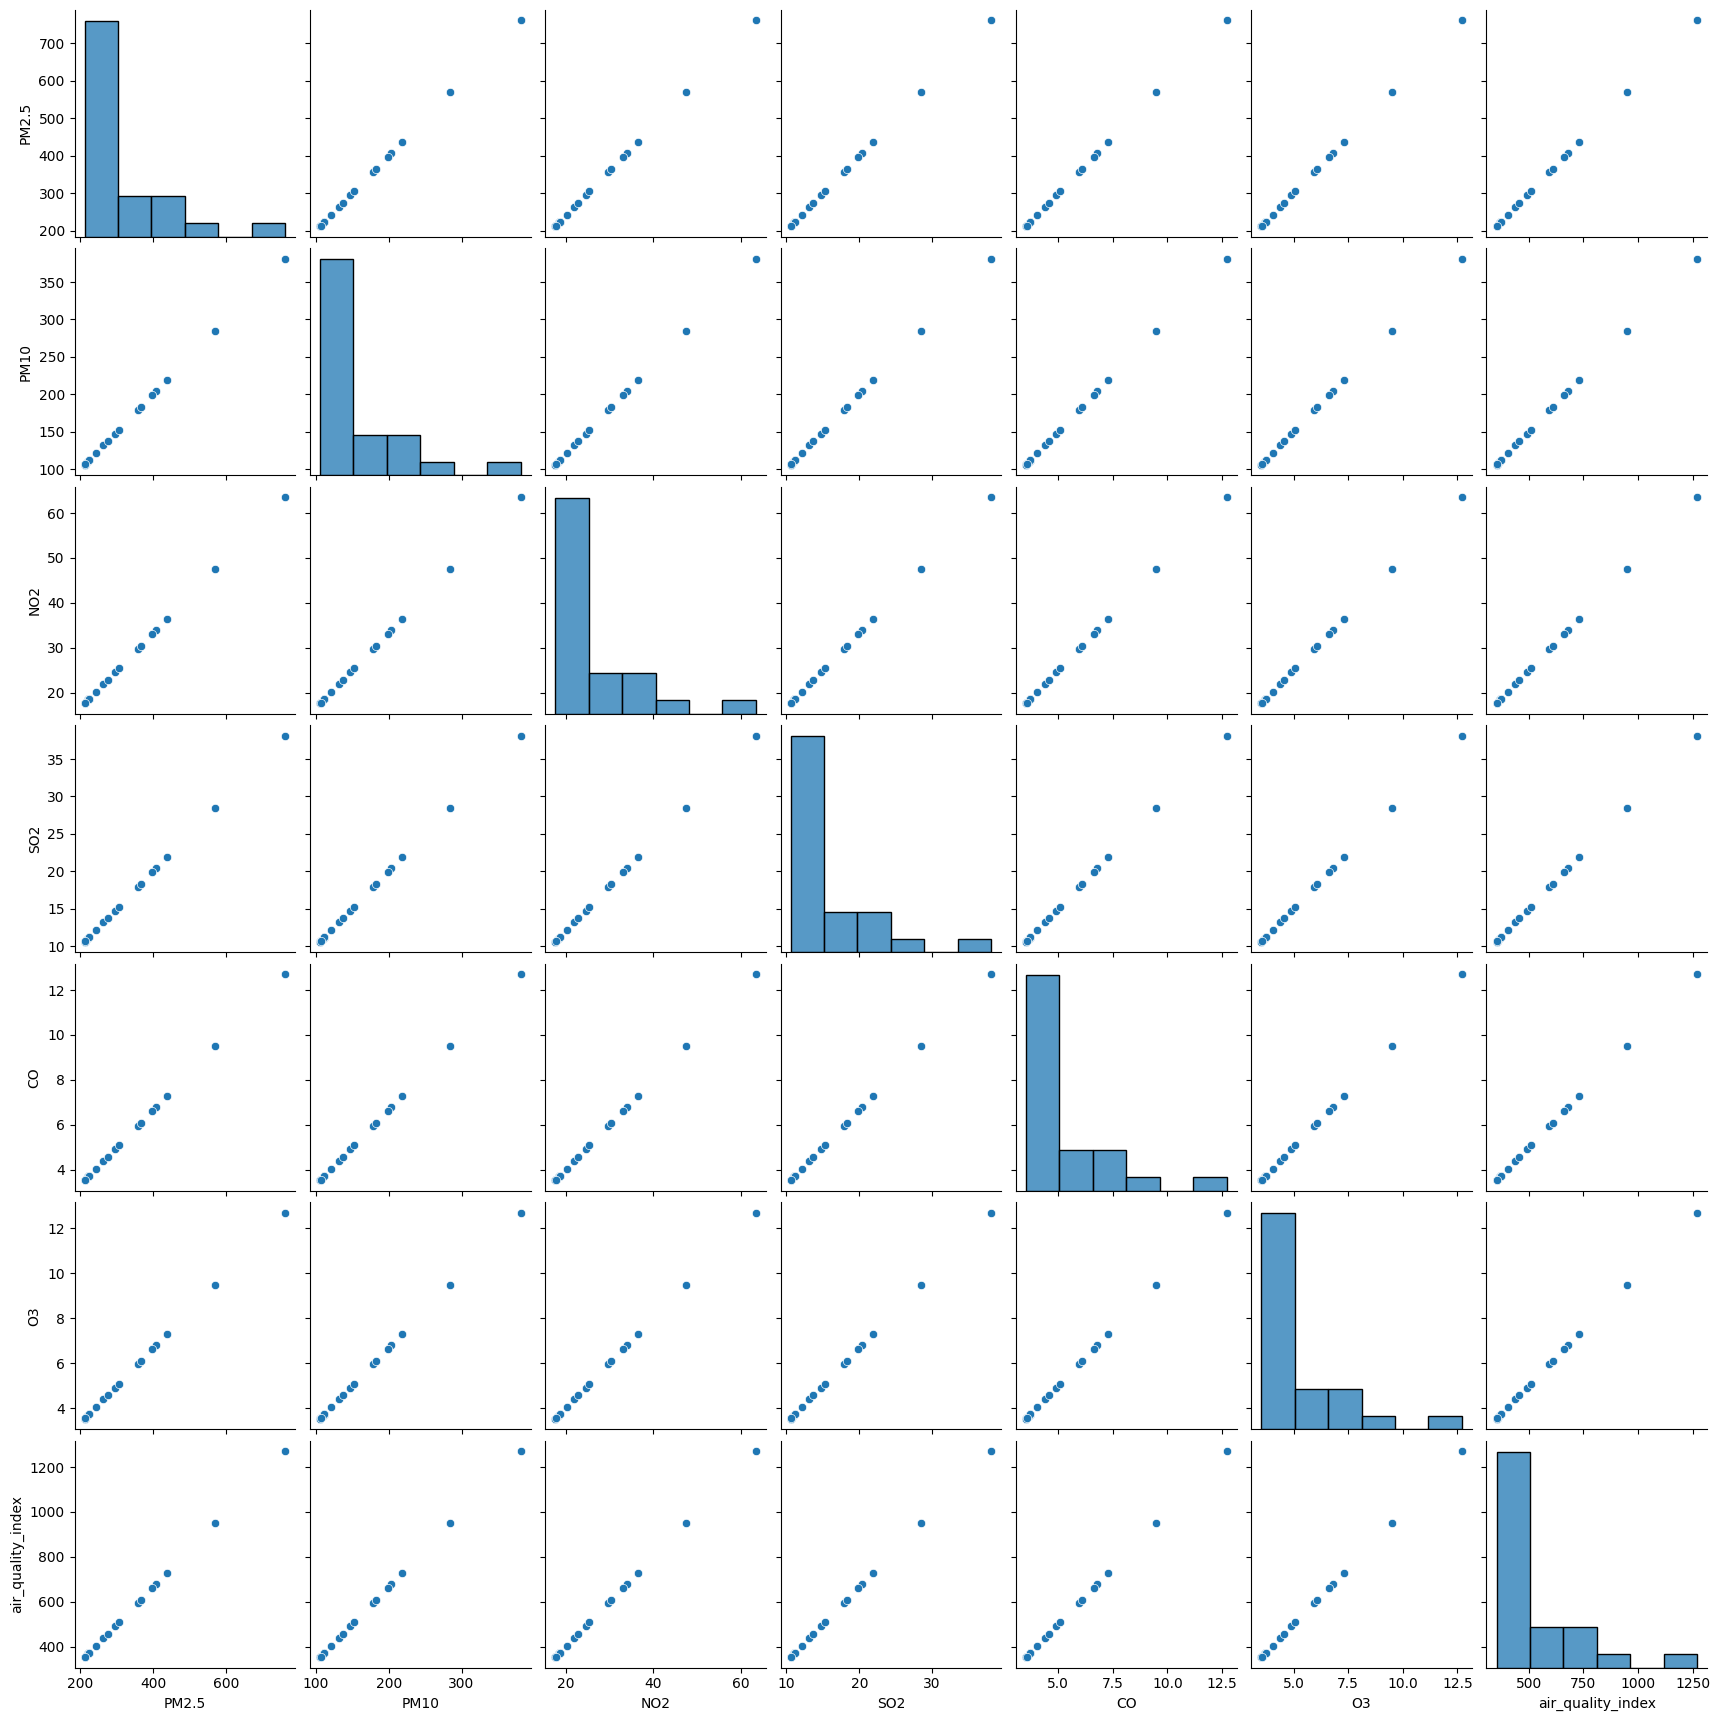

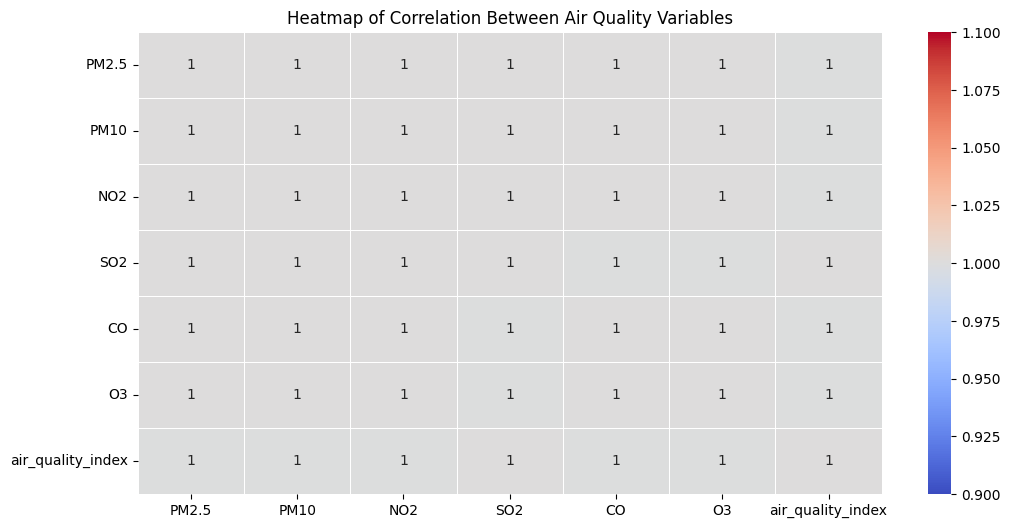

In [2]:
"""
let's create a Python project for data visualization using the `AQI.csv` file.
This project will include various types of visualizations to help understand the air quality data.
"""
### Project Structure

"""
1. **Load and Preprocess Data**
2. **Visualize Data**

### Required Libraries

You will need the following libraries:
- pandas
- matplotlib
- seaborn

"""


### Step 1: Load and Preprocess Data

# First, we'll load the data and preprocess it.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AQI.csv'
train = pd.read_csv(file_path)

# Transform the dataset
train['datetimeUtc'] = pd.to_datetime(train['datetimeUtc'])
train_grouped = train.groupby(train['datetimeUtc'].dt.floor('H'))['value'].mean().reset_index()
train_grouped.columns = ['datetimeUtc', 'air_quality_index']

# Create additional dummy columns to simulate feature columns for modeling
train_grouped['PM2.5'] = train_grouped['air_quality_index'] * 0.6
train_grouped['PM10'] = train_grouped['air_quality_index'] * 0.3
train_grouped['NO2'] = train_grouped['air_quality_index'] * 0.05
train_grouped['SO2'] = train_grouped['air_quality_index'] * 0.03
train_grouped['CO'] = train_grouped['air_quality_index'] * 0.01
train_grouped['O3'] = train_grouped['air_quality_index'] * 0.01

# Display the first few rows of the transformed dataset
print(train_grouped.head())


### Step 2: Visualize Data

## Now, we'll create various visualizations to understand the data better.

#### 1. Line Plot of AQI Over Time


plt.figure(figsize=(12, 6))
plt.plot(train_grouped['datetimeUtc'], train_grouped['air_quality_index'], label='AQI', color='b')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.title('Air Quality Index Over Time')
plt.legend()
plt.show()


#### 2. Histogram of AQI

plt.figure(figsize=(12, 6))
plt.hist(train_grouped['air_quality_index'], bins=30, color='g', edgecolor='black')
plt.xlabel('Air Quality Index')
plt.ylabel('Frequency')
plt.title('Distribution of Air Quality Index')
plt.show()

#### 3. Box Plot of AQI and its Components

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_grouped[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']])
plt.title('Box Plot of Air Quality Components')
plt.show()

#### 4. Pair Plot to Show Relationships Between Variables

sns.pairplot(train_grouped[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'air_quality_index']])
plt.show()

#### 5. Heatmap of Correlation Between Variables

plt.figure(figsize=(12, 6))
corr = train_grouped[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'air_quality_index']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Between Air Quality Variables')
plt.show()
